In [1]:
import pandas as pd
import warnings
#url안에 변수를 넣는 것

df=pd.DataFrame()
warnings.filterwarnings('ignore')

code_in = int(input("통화유형 선택 (0:USD, 1:EUR, 2:JPY)"))
currency_symbols=['USD','EUR','JPY']
currency_name=['미국 달러','유럽연합 유로','일본 엔(100)']
code = currency_symbols[code_in]
for page_num in range(1,11):
    base_url=f"https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_{code}KRW&page={page_num}"
    temp=pd.read_html(base_url,encoding='cp949',header=1)

    df=pd.concat([df,temp[0]])

print(f"==={currency_name[code_in]}*****")
print(df)

통화유형 선택 (0:USD, 1:EUR, 2:JPY) 0


===미국 달러*****
            날짜   매매기준율  전일대비     사실 때     파실 때   보내실 때   받으실 때
0   2024.06.27  1386.9   7.6  1411.17  1362.63  1400.4  1373.4
1   2024.06.26  1394.5   2.5  1418.90  1370.10  1408.1  1380.9
2   2024.06.25  1392.0   4.0  1416.36  1367.64  1405.6  1378.4
3   2024.06.24  1388.0   3.0  1412.29  1363.71  1401.6  1374.4
4   2024.06.21  1391.0   1.0  1415.34  1366.66  1404.6  1377.4
..         ...     ...   ...      ...      ...     ...     ...
5   2024.02.05  1335.5   3.0  1358.87  1312.13  1348.5  1322.5
6   2024.02.02  1338.5   7.5  1361.92  1315.08  1351.6  1325.4
7   2024.02.01  1331.0   4.0  1354.29  1307.71  1344.0  1318.0
8   2024.01.31  1335.0   4.0  1358.36  1311.64  1348.0  1322.0
9   2024.01.30  1331.0   3.5  1354.29  1307.71  1344.0  1318.0

[100 rows x 7 columns]


In [23]:
df_total=df[['날짜','매매기준율','사실 때','파실 때','보내실 때','받으실 때']]
df_total_chart=df.copy()
df_total_chart=df_total_chart.set_index('날짜')

<Axes: xlabel='날짜'>

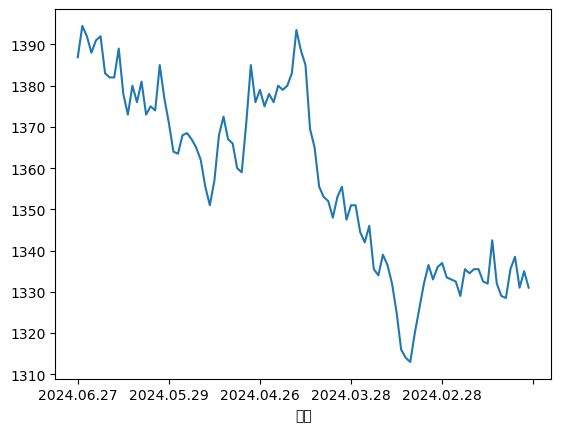

In [24]:
df_total_chart['매매기준율'].plot()

<Axes: xlabel='날짜'>

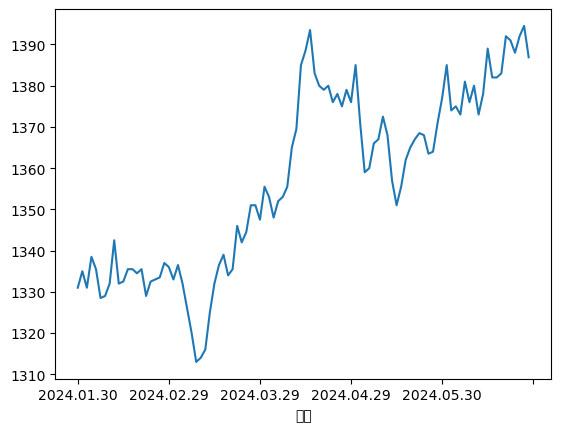

In [25]:
df_total_chart=df_total_chart[::-1]#역순으로 바꾸기
df_total_chart['매매기준율'].plot()

In [26]:
df_total['날짜']=df_total['날짜'].str.replace(".","").astype("datetime64[ms]")

In [27]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      100 non-null    datetime64[ms]
 1   매매기준율   100 non-null    float64       
 2   사실 때    100 non-null    float64       
 3   파실 때    100 non-null    float64       
 4   보내실 때   100 non-null    float64       
 5   받으실 때   100 non-null    float64       
dtypes: datetime64[ms](1), float64(5)
memory usage: 5.5 KB


In [28]:
#월 파생변수 생성
df_total['월'] =  df_total['날짜'].dt.month
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      100 non-null    datetime64[ms]
 1   매매기준율   100 non-null    float64       
 2   사실 때    100 non-null    float64       
 3   파실 때    100 non-null    float64       
 4   보내실 때   100 non-null    float64       
 5   받으실 때   100 non-null    float64       
 6   월       100 non-null    int32         
dtypes: datetime64[ms](1), float64(5), int32(1)
memory usage: 5.9 KB


In [29]:
month_in = int(input("검색할 월입력>> "))
month_df = df_total.loc[df_total['월']==month_in,['날짜','매매기준율','사실 때','파실 때','보내실 때','받으실 때']]

검색할 월입력>>  3


In [31]:
month_df=month_df.reset_index(drop=True)

In [32]:
month_df_chart=month_df.copy()

In [33]:
month_df_chart=month_df_chart.set_index('날짜')

<Axes: xlabel='날짜'>

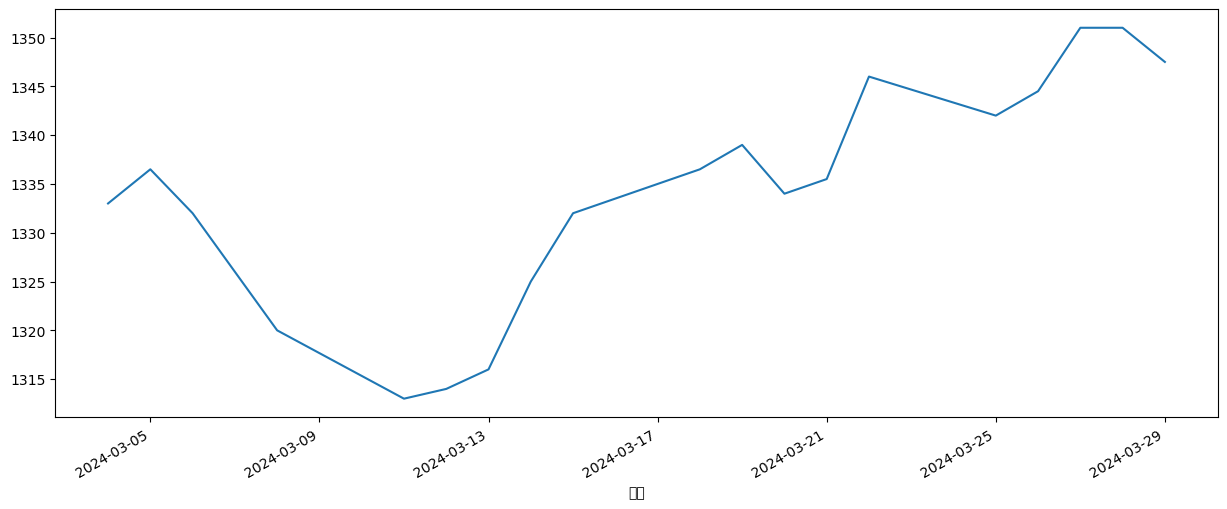

In [36]:
month_df_chart['매매기준율'].plot(figsize=(15,6))

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
 
plt.rc('font', family = 'Malgun Gothic')
warnings.filterwarnings('ignore')
 
def get_exchange_rate_data(code):
    df = pd.DataFrame()
    for page_num in range(1,13):
        base_url = f"https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_{code}USDKRW&page={page_num}"
        temp = pd.read_html(base_url, encoding='cp949', header=1)
       
        df = pd.concat([df, temp[0]])
    total_rate_data_view(df)
 
def total_rate_data_view(df):        
    df_total = df[['날짜', '매매기준율', '사실 때', '파실 때', '보내실 때', '받으실 때']]    
 
    print(f'==={currency_name[code_in]} - {code}*****')  
    print(df_total.head(20))
 
    df_total_chart = df_total.copy()
    df_total_chart = df_total_chart.set_index('날짜')
    df_total_chart = df_total_chart[::-1]
    df_total_chart['매매기준율'].plot(figsize=(15, 6), title='exchange rate')
    plt.show()        
   
    total_rate_data_view(df_total)
   
def total_rate_data_view(df_total):    
 
    df_total['날짜'] = df_total['날짜'].str.replace(".","").astype('datetime64[ms]')
 
    df_total['월'] = df_total['날짜'].dt.month
    month_in = int(input('검색할 월입력>> '))
    month_df = df_total.loc[df_total['월'] == month_in,['날짜', '매매기준율', '사실 때', '파실 때', '보내실 때', '받으실 때']]
    month_df = month_df.reset_index(drop=True)
    print(f'==={currency_name[code_in]} - {code}*****')  
    print(month_df.head(20))
    month_df_chart = month_df.copy()
    month_df_chart = month_df_chart.set_index('날짜')
    month_df_chart['매매기준율'].plot(figsize=(15,6))
    plt.show()
   
code_in= int(input("통화유형 선택(1:USD, 2:EUR, 3:JPY)"))
currency_symbols= ['USD', 'EUR', 'JPY']
currency_name= ['미국 달러', '유럽연합 유로', '일본 엔(100)']
code = currency_symbols[code_in-1]
get_exchange_rate_data(code)